# 1. パラメータの更新

* ニューラルネットワークの学習の目的は、損失関数の値を出来るだけ小さくするパラメータを見つけること。  
   これを**「最適化(optimization)」**という。
  
* 最適なパラメータを見つけるために、パラメータの勾配(微分)を手がかりに、パラメータを何度も更新して、最適なパラメータへと近づけていった。  
これを**「確率的勾配降下法(stochastic gradient descent)」、略してSGD**という。

* しかしSGDは単純な方法のため、**SGDよりもスマートな別の最適化手法**が存在する。

## 1.1 SGD

(編集中)

## 1.2 Momentum

(編集中)

## 1.3 AdaGrad

(編集中)

## 1.4 Adam

(編集中)

## 1.5 どの更新手法を用いるか?

(編集中)

## 1.6 MNISTデータ・セットによる更新手法の比較

# 2. 重みの初期化

* ニューラルネットワークの学習で特に重要なのが、**「重みの初期化」**。

* 重みの初期値にどのような値を設定するかで、学習の成否が分かれることが実際によくある。

## 2.1 重みの初期値を0にする?

* 重みの値を小さくすることで、過学習が発生しにくくなる。

* 重みを小さくするためには、初期値を0にするというアイデアが浮かぶが、それは悪いアイデア。

* なぜなら誤差逆伝播法において、全ての重みの値が均一に(同じように)更新されてしまい、たくさんの重みを持つ意味がなくなる。

## 2.2 隠れ層のアクティベーション分布

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def show_activations_hist(weight):
    
    # 1000個のデータ
    x = np.random.randn(1000, 100)
    # 各隠れ層のニューロン数
    node_num = 100
    # 隠れ層の数
    hidden_layer_size = 5
    # アクティベーションの結果
    activations = {}

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i - 1]

        w = np.random.randn(node_num, node_num) * weight

        z = np.dot(x, w)
        a = sigmoid(z)
        activations[i] = a
    
    # ヒストグラムを描画
    for i, a in activations.items():
        plt.subplot(1, len(activations), i + 1)
        plt.title(str(i + 1) + "-layer")
        plt.hist(a.flatten(), 30, range=(0, 1))
    plt.show()

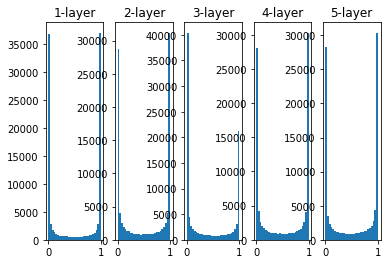

In [8]:
# 重みの標準偏差を1にして、ヒストグラムを描画する。
show_activations_hist(1)

## 勾配消失問題

* 各層のアクティベーションは0と1に偏った分布となっている。

* シグモイド関数の出力が0に近づくにつれて(または1に近づくについて)、その微分の値はゼロに近づく。

* そのため0と1に偏ってデータ分布では、誤差逆伝播法での勾配の値がどんどんと小さくなって消えている。

* 層を深くするディープラーニングではさらに深刻な問題となる。

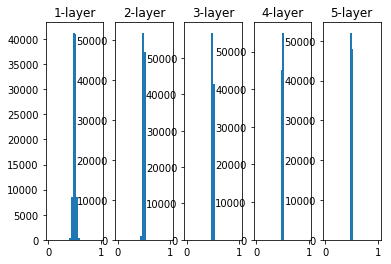

In [11]:
# 重みの標準偏差を0.01にして、ヒストグラムを描画する。
show_activations_hist(0.01)

## 表現力が乏しくなる。

* 各層のアクティベーションは0.5付近に集中した分布となった。

* 偏りはないのいで、勾配消失問題は発生していない。

* ただし、アクティベーションに偏りがあることから、表現力の問題が発生している。

* 複数のニューロンが存在するのに、同じような値を出力するということは、単一のニューロンで表現が出来るため。